In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Campaign_data.csv')

In [3]:
df

,Date,Data source,Campaign,Media Type,City,Metric,Value
0,30-12-2019,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.00
1,30-12-2019,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.00
2,30-12-2019,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Clicks,0.00
3,30-12-2019,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.00
4,30-12-2019,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.00
...,...,...,...,...,...,...,...
123694,30-09-2021,Snapchat,Pathfinder campaign 7,Online Video,Sacramento - Stockton - Modesto,Media Cost,136.94
123695,30-09-2021,Snapchat,Pathfinder campaign 7,Online Video,Sacramento - Stockton - Modesto,Clicks,81.00
123696,30-09-2021,Snapchat,Pathfinder campaign 7,Online Video,Dallas - Ft. Worth,Impressions,16579.00
123697,30-09-2021,Snapchat,Pathfinder campaign 7,Online Video,Dallas - Ft. Worth,Media Cost,297.78


In [4]:
df.shape

(123699, 7)

In [5]:
df.columns

Index(['Date', 'Data source', 'Campaign', 'Media Type', 'City', 'Metric',
       'Value'],
      dtype='object')

In [6]:
df.dtypes

Date            object
Data source     object
Campaign        object
Media Type      object
City            object
Metric          object
Value          float64
dtype: object

In [7]:
df.isnull().sum()

Date           0
Data source    0
Campaign       0
Media Type     0
City           0
Metric         0
Value          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123699 entries, 0 to 123698
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         123699 non-null  object 
 1   Data source  123699 non-null  object 
 2   Campaign     123699 non-null  object 
 3   Media Type   123699 non-null  object 
 4   City         123699 non-null  object 
 5   Metric       123699 non-null  object 
 6   Value        123699 non-null  float64
dtypes: float64(1), object(6)
memory usage: 6.6+ MB


In [12]:
for i in df.columns:
    if i == "Date":
        continue
    elif df[i].dtype == 'object':
        print(i)
        print("------------------------------------------")
        print(df[i].value_counts())
        print("\n")

Data source
------------------------------------------
Pinterest    66945
Snapchat     56754
Name: Data source, dtype: int64


Campaign
------------------------------------------
Armada campaign 2        13392
Rogue campaign 4          6030
Pathfinder campaign 2     5670
Altima campaign 3         5484
Armada campaign 4         5400
Rogue campaign 2          4923
Rogue campaign 5          4560
Pathfinder campaign 7     4332
Pathfinder campaign 8     4302
Pathfinder campaign 6     4254
Pathfinder campaign 5     4254
Sentra campaign 3         4209
Kicks campaign 4          4185
Sentra campaign 1         3954
Kicks campaign 3          3885
Altima campaign 2         3840
shop at home              3216
Rogue campaign 1          3000
Altima campaign 8         2991
Armada campaign 3         2526
Pathfinder campaign 1     2520
Kicks campaign 6          2511
Altima campaign 5         2508
Altima campaign 1         2454
Altima campaign 7         2436
Kicks campaign 5          2118
Rogue pre launc

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123699 entries, 0 to 123698
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         123699 non-null  datetime64[ns]
 1   Data source  123699 non-null  object        
 2   Campaign     123699 non-null  object        
 3   Media Type   123699 non-null  object        
 4   City         123699 non-null  object        
 5   Metric       123699 non-null  object        
 6   Value        123699 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.6+ MB


In [16]:
df['Day'] = df['Date'].dt.day

In [22]:
df['Month'] = df['Date'].dt.month 
df['Year'] = df['Date'].dt.year

In [23]:
df.head()

,Date,Data source,Campaign,Media Type,City,Metric,Value,Day,Month,Year
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.0,30,12,2019
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.0,30,12,2019
2,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Clicks,0.0,30,12,2019
3,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.0,30,12,2019
4,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.0,30,12,2019


In [55]:
df_i = df[df['Metric'] == 'Impressions']

In [56]:
(df_i.groupby(['Metric', 'Month'])[['Value']].sum()).sort_values(by = 'Value', ascending = False)[:5]

Value
Metric      Month             
Impressions 9      204293504.0
            2      127833470.0
            10     107575267.0
            8      105218378.0
            12      71560957.0

In [57]:
(df_i.groupby(['Campaign', 'Metric'])[['Value']].sum()).sort_values(by = 'Value', ascending = False)[:5]

,,Value
Campaign,Metric,
Armada campaign 2,Impressions,118817195.0
Pathfinder campaign 2,Impressions,115286607.0
Pathfinder campaign 6,Impressions,51823574.0
Pathfinder campaign 1,Impressions,48923126.0
Altima campaign 3,Impressions,45451489.0


In [58]:
df_c = df[df['Metric'] == 'Clicks']

In [59]:
(df_c.groupby(['Campaign', 'Metric'])[['Value']].sum()).sort_values(by = 'Value', ascending = False)[:5]

,,Value
Campaign,Metric,
Armada campaign 2,Clicks,241938.0
Pathfinder campaign 6,Clicks,233938.0
Rogue campaign 4,Clicks,209625.0
Kicks campaign 6,Clicks,170446.0
Altima campaign 1,Clicks,148715.0


In [62]:
(df_c.groupby(['Campaign'])[['Value']].sum()).sort_values(by = 'Value', ascending = False)[:5]

,Value
Campaign,
Armada campaign 2,241938.0
Pathfinder campaign 6,233938.0
Rogue campaign 4,209625.0
Kicks campaign 6,170446.0
Altima campaign 1,148715.0


Q - 3

In [61]:
df_m = df[df['Metric'] == 'Media Cost']

In [64]:
(df_m.groupby(['Campaign'])[['Value']].sum())

,Value
Campaign,
Altima campaign 1,489477.29
Altima campaign 2,74693.85
Altima campaign 3,376369.35
Altima campaign 4,6000.05
Altima campaign 5,18391.45
Altima campaign 6,13033.96
Altima campaign 7,19614.55
Altima campaign 8,47398.70
Armada campaign 1,8210.77


In [65]:
df_s = (df_m.groupby(['Campaign'])[['Value']].sum())

In [66]:
df_s

,Value
Campaign,
Altima campaign 1,489477.29
Altima campaign 2,74693.85
Altima campaign 3,376369.35
Altima campaign 4,6000.05
Altima campaign 5,18391.45
Altima campaign 6,13033.96
Altima campaign 7,19614.55
Altima campaign 8,47398.70
Armada campaign 1,8210.77


In [74]:
df_s.rename(columns = {'Value': 'Medical_Cost'}, inplace = True)

In [77]:
df_s1 = (df_i.groupby(['Campaign'])[['Value']].sum())

In [78]:
df_s2 = (df_c.groupby(['Campaign'])[['Value']].sum())

In [81]:
df_s1.rename(columns = {'Value': 'Impressions'}, inplace = True)
df_s2.rename(columns = {'Value': 'Clicks'}, inplace = True)

In [90]:
df_s1

,Campaign,Impressions
0,Altima campaign 1,35863660.0
1,Altima campaign 2,7200627.0
2,Altima campaign 3,45451489.0
3,Altima campaign 4,380995.0
4,Altima campaign 5,1176593.0
5,Altima campaign 6,1533773.0
6,Altima campaign 7,2043425.0
7,Altima campaign 8,6172814.0
8,Armada campaign 1,1799471.0
9,Armada campaign 2,118817195.0


In [89]:
df_s1 = df_s1.reset_index()

In [91]:
df_s2 = df_s2.reset_index()
df_s = df_s.reset_index()

In [92]:
df_n = df_s1.merge(df_s2)

In [94]:
df_new = df_n.merge(df_s)

In [95]:
df_new

,Campaign,Impressions,Clicks,Medical_Cost
0,Altima campaign 1,35863660.0,148715.0,489477.29
1,Altima campaign 2,7200627.0,2795.0,74693.85
2,Altima campaign 3,45451489.0,13412.0,376369.35
3,Altima campaign 4,380995.0,3968.0,6000.05
4,Altima campaign 5,1176593.0,13400.0,18391.45
5,Altima campaign 6,1533773.0,7732.0,13033.96
6,Altima campaign 7,2043425.0,672.0,19614.55
7,Altima campaign 8,6172814.0,1790.0,47398.70
8,Armada campaign 1,1799471.0,0.0,8210.77
9,Armada campaign 2,118817195.0,241938.0,698093.58


In [96]:
df_m = pd.read_csv('Campaign_data_models.csv')

In [97]:
df_m

,Campaign,Message type,Model
0,Sentra campaign 2,Future Market,Sentra
1,Sentra campaign 4,Future Market,Sentra
2,Sentra campaign 3,Future Market,Sentra
3,Sentra campaign 1,Future Market,Sentra
4,Altima campaign 1,Future Market,Altima
5,Altima campaign 5,Future Market,Altima
6,Altima campaign 4,Future Market,Altima
7,Altima campaign 6,Future Market,Altima
8,Kicks campaign 6,Future Market,Kicks
9,Kicks campaign 5,Future Market,Kicks


In [98]:
df_new1 = df_new.merge(df_m)

In [99]:
df_new1

,Campaign,Impressions,Clicks,Medical_Cost,Message type,Model
0,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima
1,Altima campaign 2,7200627.0,2795.0,74693.85,Future Market,Altima
2,Altima campaign 3,45451489.0,13412.0,376369.35,Future Market,Altima
3,Altima campaign 4,380995.0,3968.0,6000.05,Future Market,Altima
4,Altima campaign 5,1176593.0,13400.0,18391.45,Future Market,Altima
5,Altima campaign 6,1533773.0,7732.0,13033.96,Future Market,Altima
6,Altima campaign 7,2043425.0,672.0,19614.55,Near Market,Altima
7,Altima campaign 8,6172814.0,1790.0,47398.70,Near Market,Altima
8,Armada campaign 1,1799471.0,0.0,8210.77,Near Market,Armada
9,Armada campaign 2,118817195.0,241938.0,698093.58,Near Market,Armada


In [100]:
df_new1.head()

,Campaign,Impressions,Clicks,Medical_Cost,Message type,Model
0,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima
1,Altima campaign 2,7200627.0,2795.0,74693.85,Future Market,Altima
2,Altima campaign 3,45451489.0,13412.0,376369.35,Future Market,Altima
3,Altima campaign 4,380995.0,3968.0,6000.05,Future Market,Altima
4,Altima campaign 5,1176593.0,13400.0,18391.45,Future Market,Altima


In [102]:
df_new1['CPM'] = (df_new1['Medical_Cost']/df_new1['Impressions'])*1000

In [103]:
df_new1

,Campaign,Impressions,Clicks,Medical_Cost,Message type,Model,CPM
0,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima,13.648280
1,Altima campaign 2,7200627.0,2795.0,74693.85,Future Market,Altima,10.373242
2,Altima campaign 3,45451489.0,13412.0,376369.35,Future Market,Altima,8.280683
3,Altima campaign 4,380995.0,3968.0,6000.05,Future Market,Altima,15.748369
4,Altima campaign 5,1176593.0,13400.0,18391.45,Future Market,Altima,15.631106
5,Altima campaign 6,1533773.0,7732.0,13033.96,Future Market,Altima,8.497972
6,Altima campaign 7,2043425.0,672.0,19614.55,Near Market,Altima,9.598860
7,Altima campaign 8,6172814.0,1790.0,47398.70,Near Market,Altima,7.678621
8,Armada campaign 1,1799471.0,0.0,8210.77,Near Market,Armada,4.562880
9,Armada campaign 2,118817195.0,241938.0,698093.58,Near Market,Armada,5.875358


# 5.Find out the top 3 campaigns in terms of CPM 

In [105]:
df_new1.sort_values(by = 'CPM', ascending = False)[:3]

,Campaign,Impressions,Clicks,Medical_Cost,Message type,Model,CPM
20,Pathfinder campaign 3,3977697.0,20326.0,73584.37,Near Market,Pathfinder,18.499240
22,Pathfinder campaign 5,17292561.0,110696.0,316442.90,Near Market,Pathfinder,18.299366
24,Pathfinder campaign 7,16733721.0,111136.0,304427.70,Near Market,Pathfinder,18.192469


# 2. Which model has maximum impressions?

In [109]:
df_new1.groupby('Model')['Impressions'].sum().sort_values(ascending = False)

Model
Pathfinder     275832034.0
Armada         175569709.0
Rogue          132109157.0
Altima          99823376.0
Kicks           95929225.0
Sentra          64176011.0
Multi-Model      9135991.0
Name: Impressions, dtype: float64

# 3.Find out the top 3 campaigns in terms of impressions for every message type

In [110]:
df_new1.columns

Index(['Campaign', 'Impressions', 'Clicks', 'Medical_Cost', 'Message type',
       'Model', 'CPM'],
      dtype='object')

In [115]:
df_new1.groupby(['Message type','Campaign'])['Impressions'].sum().sort_values(ascending = False)

Message type   Campaign             
Near Market    Armada campaign 2        118817195.0
               Pathfinder campaign 2    115286607.0
               Pathfinder campaign 6     51823574.0
               Pathfinder campaign 1     48923126.0
Future Market  Altima campaign 3         45451489.0
Near Market    Armada campaign 4         37470993.0
Future Market  Altima campaign 1         35863660.0
               Kicks campaign 4          33664998.0
               Rogue campaign 5          33448074.0
               Kicks campaign 6          32993380.0
               Rogue campaign 4          32510217.0
               Kicks campaign 3          27167086.0
               Rogue campaign 2          25647766.0
               Rogue campaign 1          18925107.0
Near Market    Armada campaign 3         17482050.0
               Pathfinder campaign 5     17292561.0
Future Market  Rogue pre launch          16803859.0
Near Market    Pathfinder campaign 7     16733721.0
               Pathfinder c

In [116]:
df.head()

,Date,Data source,Campaign,Media Type,City,Metric,Value,Day,Month,Year
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.0,30,12,2019
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.0,30,12,2019
2,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Clicks,0.0,30,12,2019
3,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.0,30,12,2019
4,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.0,30,12,2019


In [118]:
df.tail()

,Date,Data source,Campaign,Media Type,City,Metric,Value,Day,Month,Year
123694,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Sacramento - Stockton - Modesto,Media Cost,136.94,30,9,2021
123695,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Sacramento - Stockton - Modesto,Clicks,81.00,30,9,2021
123696,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Dallas - Ft. Worth,Impressions,16579.00,30,9,2021
123697,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Dallas - Ft. Worth,Media Cost,297.78,30,9,2021
123698,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Dallas - Ft. Worth,Clicks,128.00,30,9,2021


In [117]:
df.groupby(['Media Type', 'Metric'])['Value'].sum()

Media Type    Metric     
Display       Clicks         3.010940e+05
              Impressions    1.783116e+08
              Media Cost     1.064136e+06
Online Video  Clicks         1.802669e+06
              Impressions    6.742639e+08
              Media Cost     6.836810e+06
Name: Value, dtype: float64

Total Months:
    - starts in December 2019.- (10 values)
    - ends in september 2021.
    - So 21 months.
                 

Average monthly media costs for each data type

In [120]:
print("For Display media type : ", (1.064136e+06)/21)

For Display media type :  50673.142857142855


In [121]:
print("For Online Video media type : ", (6.836810e+06)/21)

For Online Video media type :  325562.38095238095


# 7.Which media type is more expensive in terms of CPM?

In [122]:
df_new1

,Campaign,Impressions,Clicks,Medical_Cost,Message type,Model,CPM
0,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima,13.648280
1,Altima campaign 2,7200627.0,2795.0,74693.85,Future Market,Altima,10.373242
2,Altima campaign 3,45451489.0,13412.0,376369.35,Future Market,Altima,8.280683
3,Altima campaign 4,380995.0,3968.0,6000.05,Future Market,Altima,15.748369
4,Altima campaign 5,1176593.0,13400.0,18391.45,Future Market,Altima,15.631106
5,Altima campaign 6,1533773.0,7732.0,13033.96,Future Market,Altima,8.497972
6,Altima campaign 7,2043425.0,672.0,19614.55,Near Market,Altima,9.598860
7,Altima campaign 8,6172814.0,1790.0,47398.70,Near Market,Altima,7.678621
8,Armada campaign 1,1799471.0,0.0,8210.77,Near Market,Armada,4.562880
9,Armada campaign 2,118817195.0,241938.0,698093.58,Near Market,Armada,5.875358


In [140]:
df.head(5)

,Date,Data source,Campaign,Media Type,City,Metric,Value,Day,Month,Year
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.0,30,12,2019
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.0,30,12,2019
2,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Clicks,0.0,30,12,2019
3,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.0,30,12,2019
4,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.0,30,12,2019


In [123]:
df_a = df_new1.merge(df)

In [125]:
df_a.groupby('Media Type')['CPM'].sum()

Media Type
Display         1.588333e+05
Online Video    1.073620e+06
Name: CPM, dtype: float64

In [126]:
df.head()

,Date,Data source,Campaign,Media Type,City,Metric,Value,Day,Month,Year
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Impressions,1.0,30,12,2019
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Media Cost,0.0,30,12,2019
2,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,Clicks,0.0,30,12,2019
3,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Impressions,1.0,30,12,2019
4,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,Media Cost,0.0,30,12,2019


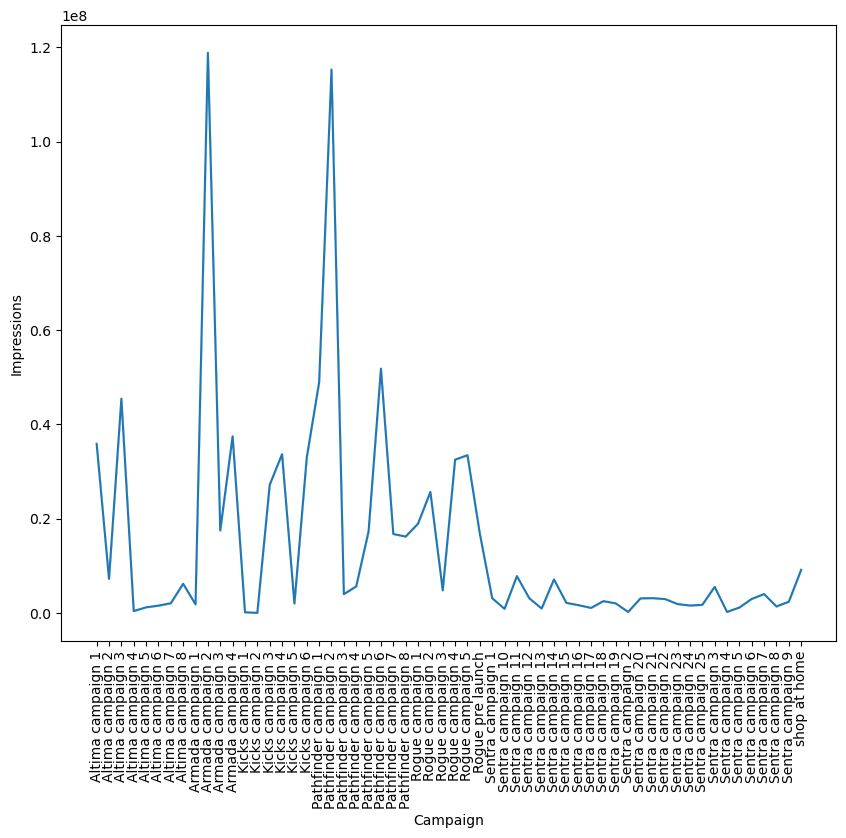

In [136]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Campaign', y='Impressions', data =df_a)
plt.xticks(rotation = 90)
plt.show()

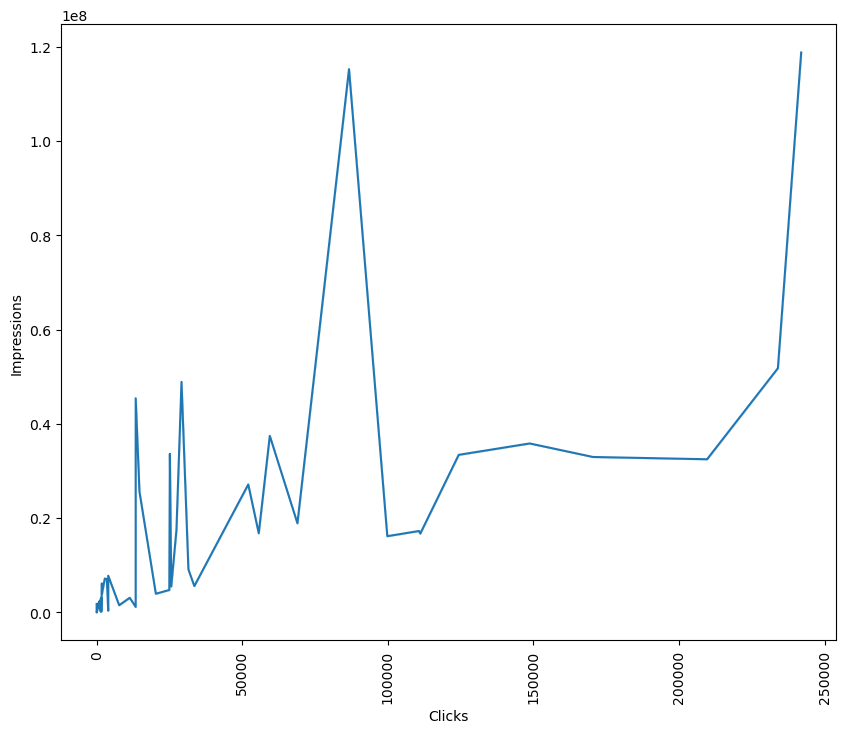

In [137]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Clicks', y='Impressions', data =df_a)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Media Type', ylabel='count'>

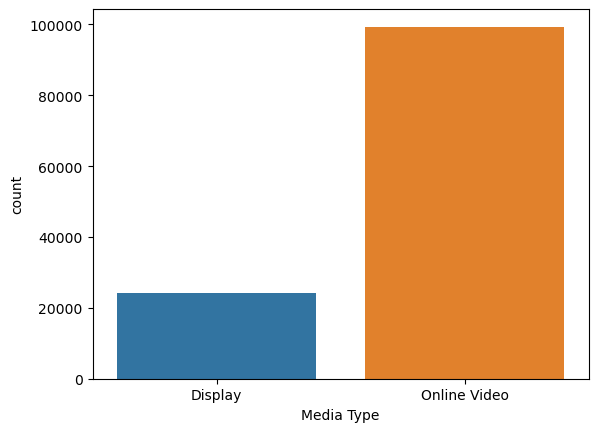

In [138]:
sns.countplot(x = 'Media Type', data =df)

<Axes: ylabel='Media Type'>

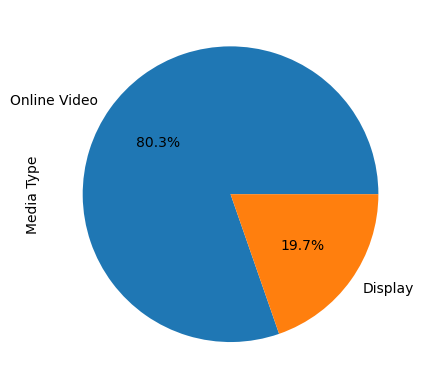

In [139]:
df['Media Type'].value_counts().plot(kind="pie", autopct="%0.1f%%")

In [143]:
df_a.head()

,Campaign,Impressions,Clicks,Medical_Cost,Message type,Model,CPM,Date,Data source,Media Type,City,Metric,Value,Day,Month,Year
0,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima,13.64828,2020-01-10,Snapchat,Online Video,Austin,Impressions,5947.00,10,1,2020
1,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima,13.64828,2020-01-10,Snapchat,Online Video,Austin,Media Cost,67.12,10,1,2020
2,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima,13.64828,2020-01-10,Snapchat,Online Video,Austin,Clicks,21.00,10,1,2020
3,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima,13.64828,2020-01-10,Snapchat,Online Video,San Antonio,Impressions,5295.00,10,1,2020
4,Altima campaign 1,35863660.0,148715.0,489477.29,Future Market,Altima,13.64828,2020-01-10,Snapchat,Online Video,San Antonio,Media Cost,58.40,10,1,2020


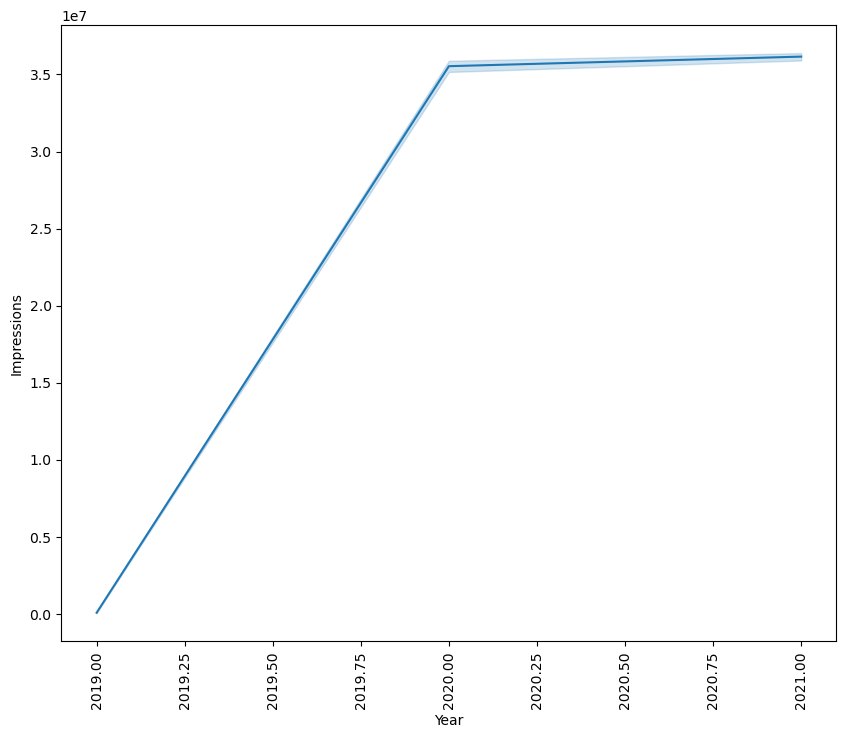

In [144]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='Impressions', data =df_a)
plt.xticks(rotation = 90)
plt.show()